In [1]:
# Necessary imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

print('Libraries imported')

Libraries imported


In [2]:
path = r'C:/Metis_Bootcamp/Regression_project/data/joined-full-data//' # data path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.shape)

df.head()

(187168, 15)


,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Entertainment,Safety,Price
0,2020 BMW 330 i xDrive,"24,371","Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$29,893"
1,2015 Audi A6 2.0T Premium Plus,"89,351","Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Brake Assist', 'Stability Control']","$16,995"
2,2018 Toyota RAV4 Limited,"11,863","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$26,225"
3,2018 Toyota RAV4 Limited,"17,501","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$25,903"
4,2019 Honda CR-V EX-L,"19,241","Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$28,145"


In [3]:
df.iloc[43283]

Name                          Certified 2018 INFINITI Q60 3.0t LUXE
Mileage                                                      18,719
Address                                              Troy, MI 48084
Rating                                                          4.4
Fuel Type                                                  Gasoline
City MPG                                                         19
Highway MPG                                                      27
Drivetrain                                                      AWD
Engine                              3.0L V6 24V GDI DOHC Twin Turbo
Exterior Color                                       Black Obsidian
Interior Color                                        Gallery White
Transmission                                      7-Speed Automatic
Entertainment                 ['Bluetooth', 'Premium Sound System']
Safety            ['Backup Camera', 'Brake Assist', 'Stability C...
Price                                           

In [4]:
def model_year_extractor(name):
    
    name_year = name.replace('Certified ','').strip()
    
    year = int(name_year.split(' ')[0])
    
    return year

In [5]:
df['Model Year'] = df['Name'].apply(model_year_extractor)

In [6]:
df = df[df['Model Year'] > 2000]
df['Model Year'].value_counts().sort_index()

2001      156
2002      237
2003      300
2004      397
2005      529
2006      740
2007     1023
2008     1159
2009      920
2010     1331
2011     2032
2012     2998
2013     4957
2014     5927
2015     8105
2016     9634
2017    23562
2018    50953
2019    24521
2020    25652
2021    21333
2022       58
Name: Model Year, dtype: int64

In [7]:
df.shape

(186524, 16)

In [8]:
def make_extractor(name):
    
    if 'Land' in name:
        return 'Land Rover'
    
    elif 'Alfa' in name:
        return 'Alfa Romeo'
    
    elif 'MINI' in name:
        return 'MINI Cooper'
    
    elif 'Aston' in name:
        return 'Aston Martin'
    
    else:
        return name.split(' ')[2]

In [9]:
def car_model_extractor(name):
    try:
        return name.split(' ')[3]
    except:
        return name.split(' ')[2]

In [10]:
df['Car Model'] = df['Name'].apply(car_model_extractor)

In [11]:
df['Car Model'].value_counts().head(20)

F-150         5231
Grand         4384
Silverado     3960
1500          3331
Rogue         2897
Wrangler      2791
RAV4          2743
Explorer      2718
Camry         2696
Escape        2657
Rover         2491
Equinox       2413
CR-V          2388
Highlander    2284
Cherokee      2275
Accord        2221
Civic         2053
Sierra        1940
Corolla       1806
Altima        1755
Name: Car Model, dtype: int64

In [12]:
other_model = df['Car Model'].value_counts()[df['Car Model'].value_counts() <= 5].index
df['Car Model'] = df['Car Model'].replace(other_model, 'Other')
df['Car Model'].value_counts()

F-150          5231
Grand          4384
Silverado      3960
1500           3331
Rogue          2897
               ... 
Utility           6
SL550             6
Mountaineer       6
Crossfire         6
NSX               6
Name: Car Model, Length: 499, dtype: int64

In [13]:
df['Make'] = df['Name'].apply(make_extractor)

In [14]:
df['Make'].value_counts()

Ford             20284
Chevrolet        16322
Toyota           15950
Jeep             12347
Nissan           10651
BMW              10083
Honda            10074
Mercedes-Benz     9675
Hyundai           6941
Lexus             6651
GMC               6067
Audi              5833
Volkswagen        5452
Kia               4881
Dodge             4740
RAM               4209
Subaru            3977
Acura             3662
INFINITI          3578
Cadillac          3544
Mazda             3393
Land Rover        2532
Buick             2339
Lincoln           2107
Volvo             2062
Chrysler          1715
Porsche           1453
Alfa Romeo         932
Jaguar             901
MINI Cooper        885
Mitsubishi         675
Tesla              645
Genesis            521
Maserati           423
FIAT               233
Scion              150
Bentley            111
Pontiac             95
Ferrari             81
Lamborghini         52
Saturn              51
Aston Martin        49
Rolls-Royce         48
Hummer     

In [15]:
other_make = df['Make'].value_counts()[df['Make'].value_counts() <= 20].index
df['Make'] = df['Make'].replace(other_make, 'Other')
df['Make'].value_counts()

Ford             20284
Chevrolet        16322
Toyota           15950
Jeep             12347
Nissan           10651
BMW              10083
Honda            10074
Mercedes-Benz     9675
Hyundai           6941
Lexus             6651
GMC               6067
Audi              5833
Volkswagen        5452
Kia               4881
Dodge             4740
RAM               4209
Subaru            3977
Acura             3662
INFINITI          3578
Cadillac          3544
Mazda             3393
Land Rover        2532
Buick             2339
Lincoln           2107
Volvo             2062
Chrysler          1715
Porsche           1453
Alfa Romeo         932
Jaguar             901
MINI Cooper        885
Mitsubishi         675
Tesla              645
Genesis            521
Maserati           423
FIAT               233
Scion              150
Bentley            111
Pontiac             95
Ferrari             81
Lamborghini         52
Saturn              51
Aston Martin        49
Rolls-Royce         48
Hummer     

In [16]:
def mileage_to_int(mileage):
    
    return int(mileage.replace(',',''))

def price_to_int(price):
    
    return int(price.replace('$','').replace(',',''))

In [17]:
#Converse mileage and price to int

df['Mileage'] = df['Mileage'].apply(mileage_to_int)

df['Price'] = df['Price'].apply(price_to_int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186524 entries, 0 to 187167
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            186524 non-null  object 
 1   Mileage         186524 non-null  int64  
 2   Address         186524 non-null  object 
 3   Rating          186423 non-null  float64
 4   Fuel Type       186524 non-null  object 
 5   City MPG        186524 non-null  int64  
 6   Highway MPG     186524 non-null  int64  
 7   Drivetrain      186524 non-null  object 
 8   Engine          186524 non-null  object 
 9   Exterior Color  186524 non-null  object 
 10  Interior Color  186524 non-null  object 
 11  Transmission    186524 non-null  object 
 12  Entertainment   186524 non-null  object 
 13  Safety          186524 non-null  object 
 14  Price           186524 non-null  int64  
 15  Model Year      186524 non-null  int64  
 16  Car Model       186524 non-null  object 
 17  Make      

In [18]:
df.Price.isna().sum()

0

In [19]:
df.Price.describe()

count    1.865240e+05
mean     2.992095e+04
std      1.843230e+04
min      1.000000e+03
25%      1.985000e+04
50%      2.699900e+04
75%      3.659000e+04
max      1.450000e+06
Name: Price, dtype: float64

In [20]:
def num_ent_fea(entertainment):
    
    if '-1' in entertainment.lower():
        return None
    else:
        return len(entertainment.split(','))

def num_safe_fea(safety):
    
    if '-1' in safety.lower():
        return None
    else:
        return len(safety.split(','))

In [21]:
df['Entertainment'] = df['Entertainment'].apply(num_ent_fea)
df['Safety'] = df['Safety'].apply(num_safe_fea)

In [22]:
df.rename(columns={'Entertainment': 'Num_ent_features', 'Safety': 'Num_safe_features'}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186524 entries, 0 to 187167
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               186524 non-null  object 
 1   Mileage            186524 non-null  int64  
 2   Address            186524 non-null  object 
 3   Rating             186423 non-null  float64
 4   Fuel Type          186524 non-null  object 
 5   City MPG           186524 non-null  int64  
 6   Highway MPG        186524 non-null  int64  
 7   Drivetrain         186524 non-null  object 
 8   Engine             186524 non-null  object 
 9   Exterior Color     186524 non-null  object 
 10  Interior Color     186524 non-null  object 
 11  Transmission       186524 non-null  object 
 12  Num_ent_features   175714 non-null  float64
 13  Num_safe_features  182501 non-null  float64
 14  Price              186524 non-null  int64  
 15  Model Year         186524 non-null  int64  
 16  Ca

In [24]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,2.0,6.0,28145,2019,CR-V,Honda


In [25]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,186524.00000,186423.000000,186524.000000,186524.000000,175714.000000,182501.000000,1.865240e+05,186524.000000
mean,39286.68040,4.286570,21.248011,29.569787,1.833980,3.688172,2.992095e+04,2017.561322
std,37515.42747,0.705744,12.292071,25.175016,0.712568,1.403610,1.843230e+04,3.011740
min,1.00000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000e+03,2001.000000
25%,14692.00000,4.100000,17.000000,24.000000,1.000000,3.000000,1.985000e+04,2017.000000
50%,30020.00000,4.500000,20.000000,28.000000,2.000000,3.000000,2.699900e+04,2018.000000
75%,50299.00000,4.800000,24.000000,32.000000,2.000000,5.000000,3.659000e+04,2020.000000
max,999999.00000,5.000000,264.000000,684.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [26]:
def define_transmission(transmission):
    
    if 'automatic' in transmission.lower():
        return 'Automatic'
    
    elif 'manual' in transmission.lower():
        return 'Manual'
    
    else:
        return None

In [27]:
df['Transmission'] = df['Transmission'].apply(define_transmission)

In [28]:
df['Transmission'].value_counts()

Automatic    180246
Manual         3535
Name: Transmission, dtype: int64

In [29]:
df['Transmission'].isna().sum()

2743

In [30]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,6.0,28145,2019,CR-V,Honda


In [31]:
df.Engine.value_counts().head(50)

 2.0L I4 16V GDI DOHC Turbo                          21635
 3.6L V6 24V MPFI DOHC                                8033
 1.5L I4 16V GDI DOHC Turbo                           7637
 3.6L V6 24V GDI DOHC                                 6400
 3.5L V6 24V MPFI DOHC                                5470
 5.3L V8 16V GDI OHV                                  5245
 2.4L I4 16V GDI DOHC                                 5204
 2.5L I4 16V MPFI DOHC                                4816
 2.0L I4 16V MPFI DOHC                                4470
 2.5L I4 16V GDI DOHC                                 3594
 2.4L I4 16V MPFI SOHC                                3499
 3.5L V6 24V PDI DOHC                                 3477
 3.5L V6 24V GDI DOHC                                 3277
 5.7L V8 16V MPFI OHV                                 3195
 3.5L V6 24V GDI SOHC                                 3130
 3.0L V6 24V GDI DOHC Twin Turbo                      2878
 2.5L I4 16V PDI DOHC                                 27

In [32]:
def define_engine(engine):
    
    if '-1' in engine.lower():
        return None
    
    elif 'intercooled' in engine.lower() or 'regular' in engine.lower() or 'electric' in engine.lower():
        return engine.strip()
    
    else:
        return engine.strip().split(' ')[0]

In [33]:
df['Engine'] = df['Engine'].apply(define_engine)

In [34]:
other_engine = df['Engine'].value_counts()[df['Engine'].value_counts() <= df.shape[0]*0.001].index
df['Engine'] = df['Engine'].replace(other_engine, 'Other')
df['Engine'].value_counts()

2.0L                                                       35890
3.5L                                                       20890
3.6L                                                       16299
2.5L                                                       16235
2.4L                                                       10698
1.5L                                                        9346
3.0L                                                        9252
Other                                                       5957
5.3L                                                        5943
1.8L                                                        4725
5.7L                                                        4208
1.6L                                                        3593
1.4L                                                        3494
6.2L                                                        2576
5.0L                                                        2142
Electric                 

In [35]:
df.Engine.isna().sum()

154

In [36]:
df['Exterior Color'].value_counts().head(30)

 Black                                 16329
 White                                 11815
 Gray                                   7471
 Silver                                 5737
 Blue                                   3878
 Summit White                           3871
 Red                                    2851
 Bright White Clearcoat                 2682
 Gun Metallic                           2127
 Granite Crystal Clearcoat Metallic     2118
 Oxford White                           2041
 Silver Ice Metallic                    1782
-1                                      1635
 Diamond Black                          1611
 Crystal Black Pearl                    1587
 Shadow Black                           1506
 Super White                            1415
 Alpine White                           1415
 Billet Silver Metallic Clearcoat       1381
 Polar White                            1256
 Modern Steel Metallic                  1253
 Pure White                             1151
 Black Sap

In [37]:
def define_exterior_color(exterior_color):
    
    if 'black' in exterior_color.lower():
        return 'Black'
    
    elif 'white' in exterior_color.lower():
        return 'White'
    
    elif 'gray' in exterior_color.lower():
        return 'Gray'
    
    elif 'silver' in exterior_color.lower():
        return 'Silver'
    
    elif 'blue' in exterior_color.lower():
        return 'Blue'
    
    elif 'red' in exterior_color.lower():
        return 'Red'
    
    elif 'metallic' in exterior_color.lower():
        return 'Metallic'
    
    elif '-1' in exterior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [38]:
df['Exterior Color'] = df['Exterior Color'].apply(define_exterior_color)

In [39]:
df['Exterior Color'].value_counts()

Black       43177
White       41015
Silver      23038
Gray        18955
Blue        16331
Other       15105
Metallic    14682
Red         12586
Name: Exterior Color, dtype: int64

In [40]:
df['Exterior Color'].isna().sum()

1635

In [41]:
df['Interior Color'].value_counts().head(30)

 Black                  68446
-1                      22683
 Jet Black              11426
 Gray                   10947
 Ebony                   8703
 Charcoal                6631
 Beige                   4042
 Graphite                3631
 Titan Black             2371
 Charcoal Black          2280
 Ash                     1595
 Tan                     1184
 Parchment               1163
 Ivory                   1163
 Ebony Black             1117
 Medium Earth Gray       1082
 Brown                    996
 Red                      837
 Sport                    786
 Diesel Gray / Black      725
 Light Gray               703
 Medium Light Stone       593
 Medium Ash Gray          576
 Dark Gray                547
 Wheat                    512
 Mocha                    484
 Cocoa / Dune             477
 Carbon Black             474
 Ebony / Ebony            466
 Almond                   459
Name: Interior Color, dtype: int64

In [42]:
def define_interior_color(interior_color):

    if 'ebony' in interior_color.lower() or 'ebony black' in interior_color.lower():
        return 'Ebony'
    
    elif 'black' in interior_color.lower():
        return 'Black'
    
    elif 'gray' in interior_color.lower():
        return 'Gray'
    
    elif 'charcoal' in interior_color.lower():
        return 'Charcoal'
    
    elif 'graphite' in interior_color.lower():
        return 'Graphite'
    
    elif '-1' in interior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [43]:
df['Interior Color'] = df['Interior Color'].apply(define_interior_color)

In [44]:
df['Interior Color'].value_counts()

Black       92714
Other       32040
Gray        17262
Ebony       11214
Charcoal     6814
Graphite     3797
Name: Interior Color, dtype: int64

In [45]:
def define_drivetrain(drivetrain):
    
    if 'fwd' in drivetrain.lower() or 'front wheel drive' in drivetrain.lower() or 'front-wheel drive' in drivetrain.lower():
        return 'FWD'
    
    elif 'awd' in drivetrain.lower() or 'all wheel drive' in drivetrain.lower() or 'all-wheel drive' in drivetrain.lower():
        return 'AWD'
    
    elif '4wd' in drivetrain.lower() or 'four wheel drive' in drivetrain.lower() or 'four-wheel drive' in drivetrain.lower():
        return '4WD'
    
    elif 'rwd' in drivetrain.lower() or 'rear wheel drive' in drivetrain.lower() or 'rear-wheel drive' in drivetrain.lower():
        return 'RWD'
    
    else:
        return np.nan

In [46]:
df['Drivetrain'] = df['Drivetrain'].apply(define_drivetrain)

In [47]:
df['Drivetrain'].value_counts()

FWD    64156
AWD    60924
4WD    38904
RWD    21899
Name: Drivetrain, dtype: int64

In [48]:
      
df['City MPG'] = df['City MPG'].apply(lambda x: np.nan if x == -1 else x)

df['City MPG'].fillna(df['City MPG'].median(), inplace=True)

df['Highway MPG'] = df['Highway MPG'].apply(lambda x: np.nan if x == -1 else x)

df['Highway MPG'].fillna(df['Highway MPG'].median(), inplace=True)

In [49]:
df.isna().sum()

Name                     0
Mileage                  0
Address                  0
Rating                 101
Fuel Type                0
City MPG                 0
Highway MPG              0
Drivetrain             641
Engine                 154
Exterior Color        1635
Interior Color       22683
Transmission          2743
Num_ent_features     10810
Num_safe_features     4023
Price                    0
Model Year               0
Car Model                0
Make                     0
dtype: int64

In [50]:
print('Shape of dataframe before dropping rows that contain null values: {}'.format(df.shape[0]))
df.dropna(inplace=True)
print('Shape of dataframe after dropping rows that contain null values: {}'.format(df.shape[0]))

Shape of dataframe before dropping rows that contain null values: 186524
Shape of dataframe after dropping rows that contain null values: 152018


In [51]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,152018.000000,152018.00000,152018.000000,152018.000000,152018.000000,152018.000000,1.520180e+05,152018.000000
mean,35460.939132,4.32535,22.455486,30.657718,1.860201,3.782815,3.071276e+04,2017.952979
std,32756.609619,0.67556,10.941336,21.931450,0.714034,1.374101,1.894775e+04,2.440061
min,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.500000e+03,2001.000000
25%,13009.000000,4.20000,18.000000,25.000000,1.000000,3.000000,2.000900e+04,2017.000000
50%,28687.000000,4.50000,21.000000,28.000000,2.000000,3.000000,2.752600e+04,2018.000000
75%,46288.500000,4.80000,24.000000,32.000000,2.000000,5.000000,3.700000e+04,2020.000000
max,492592.000000,5.00000,204.000000,684.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152018 entries, 0 to 187167
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               152018 non-null  object 
 1   Mileage            152018 non-null  int64  
 2   Address            152018 non-null  object 
 3   Rating             152018 non-null  float64
 4   Fuel Type          152018 non-null  object 
 5   City MPG           152018 non-null  float64
 6   Highway MPG        152018 non-null  float64
 7   Drivetrain         152018 non-null  object 
 8   Engine             152018 non-null  object 
 9   Exterior Color     152018 non-null  object 
 10  Interior Color     152018 non-null  object 
 11  Transmission       152018 non-null  object 
 12  Num_ent_features   152018 non-null  float64
 13  Num_safe_features  152018 non-null  float64
 14  Price              152018 non-null  int64  
 15  Model Year         152018 non-null  int64  
 16  Ca

<AxesSubplot:xlabel='Price', ylabel='Density'>

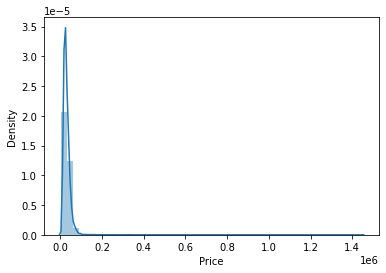

In [53]:
#Check price distribution
sns.distplot(df.Price)

In [54]:
df = df[df.Price <= (df.Price.mean() + 3 * df.Price.std())]

In [55]:
df.shape

(150825, 18)

<AxesSubplot:xlabel='Price', ylabel='Density'>

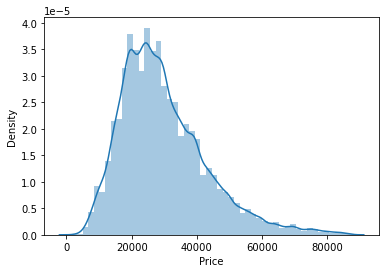

In [56]:
sns.distplot(df.Price)

In [57]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,150825.000000,150825.000000,150825.000000,150825.000000,150825.000000,150825.000000,150825.000000,150825.000000
mean,35660.030917,4.324981,22.500255,30.548974,1.856423,3.787151,29765.636678,2017.947595
std,32791.703513,0.674811,10.935878,21.286401,0.712803,1.374576,13268.822894,2.439940
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1500.000000,2001.000000
25%,13281.000000,4.200000,18.000000,25.000000,1.000000,3.000000,19999.000000,2017.000000
50%,28851.000000,4.500000,21.000000,28.000000,2.000000,3.000000,27440.000000,2018.000000
75%,46542.000000,4.800000,24.000000,32.000000,2.000000,5.000000,36982.000000,2020.000000
max,492592.000000,5.000000,204.000000,414.000000,4.000000,7.000000,87488.000000,2022.000000


In [58]:
df.duplicated().sum()

28285

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122540 entries, 0 to 187167
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               122540 non-null  object 
 1   Mileage            122540 non-null  int64  
 2   Address            122540 non-null  object 
 3   Rating             122540 non-null  float64
 4   Fuel Type          122540 non-null  object 
 5   City MPG           122540 non-null  float64
 6   Highway MPG        122540 non-null  float64
 7   Drivetrain         122540 non-null  object 
 8   Engine             122540 non-null  object 
 9   Exterior Color     122540 non-null  object 
 10  Interior Color     122540 non-null  object 
 11  Transmission       122540 non-null  object 
 12  Num_ent_features   122540 non-null  float64
 13  Num_safe_features  122540 non-null  float64
 14  Price              122540 non-null  int64  
 15  Model Year         122540 non-null  int64  
 16  Ca

In [61]:
df.shape

(122540, 18)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

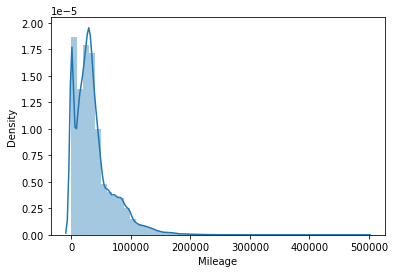

In [62]:
sns.distplot(df.Mileage)

In [63]:
df.shape

(122540, 18)

In [64]:
df = df[df.Mileage <= 200000]
df.shape

(122351, 18)

In [65]:
df.Mileage

0          24371
2          11863
7          10422
8          24351
10         23152
           ...  
187150     34911
187152     46105
187159     51170
187165    127717
187167     76590
Name: Mileage, Length: 122351, dtype: int64

In [66]:
df['Fuel Type'] = df['Fuel Type'].apply(lambda x: x.strip())

In [67]:
df['Fuel Type'].values

array(['Gasoline', 'Gasoline', 'Gasoline', ..., 'Gasoline', 'Gasoline',
       'Gasoline'], dtype=object)

In [68]:
df.to_csv('cleaned_full_data.csv')

In [72]:
df[df.Make == 'Tesla'].sample(10)

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
48276,2018 Tesla Model 3 Long Range,47497,"Clive, IA 50325",4.9,Electric,136.0,123.0,RWD,Electric,Red,Black,Automatic,2.0,6.0,36992,2018,Model,Tesla
26960,2015 Tesla Model S 70D,53556,"Madison, TN 37115",4.8,Electric,101.0,102.0,AWD,Electric,Gray,Black,Automatic,1.0,6.0,36995,2015,Model,Tesla
18313,2017 Tesla Model S 75,48909,"Roswell, GA 30075",4.4,Electric,97.0,100.0,RWD,Electric,Red,Other,Automatic,2.0,4.0,42999,2017,Model,Tesla
52443,2015 Tesla Model S 85D,64196,"Milwaukee, WI 53221",4.9,Electric,21.0,28.0,AWD,Electric,Black,Other,Automatic,1.0,5.0,39600,2015,Model,Tesla
143722,2018 Tesla Model 3 Performance,33143,"Whittier, CA 90602",4.0,Electric,120.0,112.0,AWD,Electric,Silver,Other,Automatic,1.0,4.0,47300,2018,Model,Tesla
153979,2016 Tesla Model X 60D,35152,"San Francisco, CA 94080",3.8,Electric,91.0,94.0,AWD,Electric,White,Black,Automatic,1.0,4.0,54000,2016,Model,Tesla
128462,2017 Tesla Model S 100D,34902,"Phoenix, AZ 85022",4.4,Electric,101.0,102.0,AWD,Electric,Silver,Black,Automatic,1.0,4.0,58999,2017,Model,Tesla
308,2019 Tesla Model 3 Mid Range,49135,"Long Island City, NY 11101",4.3,Electric,128.0,117.0,RWD,Electric,Black,Black,Automatic,1.0,4.0,35995,2019,Model,Tesla
19117,2016 Tesla Model X 75D,26969,"Lilburn, GA 30047",4.0,Electric,91.0,95.0,AWD,Electric,Metallic,Black,Automatic,1.0,4.0,59888,2016,Model,Tesla
15162,2019 Tesla Model 3 Standard Range Plus,11085,"Washington, VA 22015",4.2,Electric,140.0,124.0,RWD,Electric,Black,Black,Automatic,1.0,4.0,37590,2019,Model,Tesla
